# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_study


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice using .nunique
mouse_count=mouse_study["Mouse ID"].nunique()
mouse_count


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#------------------------------------------------------------------------------------------

# from study group on 1/28/24
# Find duplicate rows

mouse_repeats = mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID","Timepoint"])]
mouse_repeats


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Display the duplicate rows from the cell above.
mouse_repeats.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse=mouse_study.drop_duplicates(["Mouse ID","Timepoint"])
clean_mouse



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_recount=clean_mouse["Mouse ID"].nunique()
mouse_recount


249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor 
#     volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.

#----------------------------------------------------------------------------------------

# Create a df with just the drug name and tumor volume.
drugs_tumors_df = clean_mouse[["Drug Regimen","Tumor Volume (mm3)"]]
grouped_drugs = drugs_tumors_df.groupby("Drug Regimen")

# Find the summary stats of each drug.
mean_values = grouped_drugs["Tumor Volume (mm3)"].mean()

median_values = grouped_drugs["Tumor Volume (mm3)"].median()

variance_values = grouped_drugs["Tumor Volume (mm3)"].var()

stdev_values = grouped_drugs["Tumor Volume (mm3)"].std()

sem_values = grouped_drugs["Tumor Volume (mm3)"].sem()

# Add the summary stats to the grouped_drugs data frame.
summary_stats = pd.DataFrame({
    "Mean":mean_values,
    "Median": median_values,
    "Variance": variance_values,
    "Standard Deviation": stdev_values,
    "SEM": sem_values})
summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_aggregation = grouped_drugs.describe()
summary_stats_aggregation


Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  156.0  52.393463  6.568014  45.000000  47.046068   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.909965  56.491585  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#----------------------------------------------------------------------------------------

# Create a simplified dataframe with Drug Regimen, Mouse ID, and Timepoints.
bar_plot_df = clean_mouse[["Mouse ID", "Drug Regimen","Timepoint"]]
bar_plot_df.groupby("Drug Regimen")


# want to create bar chart with drug regimen as x, and total number of rows as y
y_axis = bar_plot_df["Mouse ID"].count()
x_axis = bar_plot_df["Mouse ID"]
bar_plot_df.plot.bar(x = x_axis, y = y_axis, rot = 0)
plt.show()

KeyError: "None of [Index(['k403', 'k403', 'k403', 'k403', 'k403', 'k403', 'k403', 'k403', 'k403',\n       'k403',\n       ...\n       'z969', 'z969', 'z969', 'z969', 'z969', 'z969', 'z969', 'z969', 'z969',\n       'z969'],\n      dtype='object', length=1888)] are in the [columns]"

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar

Sex   
Male      958
Female    930
Name: count, dtype: int64


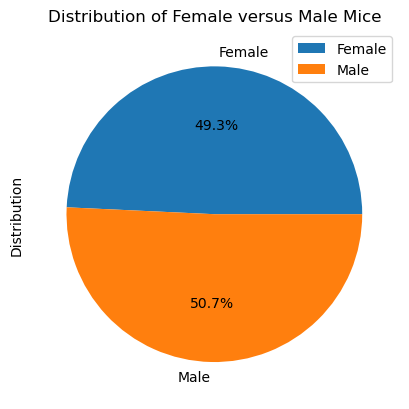

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#----------------------------------------------------------------------------------------

# Pull out counts for female vs male mice.
f_v_m = clean_mouse[["Sex"]]
print(f_v_m.value_counts())

# Using the counts, create a simple df to make the pie chart.
fvm = {"Sex":["Female","Male"],
          "Distribution":[930,958]}
fvm_df=pd.DataFrame(fvm)


#Create the pie plot using Pandas.
fvm_df.plot(kind = 'pie', y = "Distribution", labels = fvm_df["Sex"], autopct = '%1.1f%%')

# Display the pie chart.
plt.title("Distribution of Female versus Male Mice")
plt.show()


Sex   
Male      958
Female    930
Name: count, dtype: int64


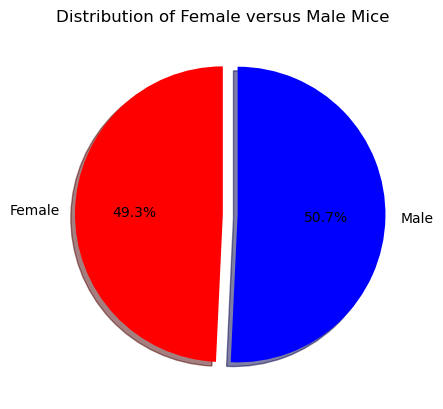

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#----------------------------------------------------------------------------------------

# Pull out counts for female vs male mice.
f_v_m = clean_mouse[["Sex"]]
print(f_v_m.value_counts())

# Define the labels, sex counts, colors, and exploded view.
labels = ["Female","Male"]
size = [930,958]

colors = ["red","blue"]

explode = (0,0.1)

# Use pyplot to create the pie charts with the above variables.
plt.pie(size, explode=explode,labels=labels, colors=colors, startangle=90, autopct="%1.1f%%", shadow=True)
plt.title("Distribution of Female versus Male Mice")

# Display the pie chart.
plt.show()



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
